In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date

In [2]:
cus= pd.read_csv(r"D:\work\Project\A3\Customer.csv")

In [3]:
cus['Gender']=cus['Gender'].fillna(cus['Gender'].mode()[0])
cus['city_code']=cus['city_code'].fillna(cus['city_code'].mode()[0])

In [4]:
cus.rename(columns={'customer_Id':'cust_id'},inplace=True)

In [5]:
prod= pd.read_csv(r"D:\work\Project\A3\prod_cat_info.csv")

In [6]:
prod.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [7]:
tran= pd.read_csv(r"D:\work\Project\A3\Transactions.csv")

In [8]:
tran.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
cus.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [10]:
prod.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [11]:
first=pd.merge(tran,cus,on='cust_id',how='left')

In [12]:
Customer_Final=pd.merge(first,prod,on=['prod_subcat_code','prod_cat_code'],how='left')

In [13]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,Children


In [14]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              0
city_code           0
prod_cat            0
prod_subcat         0
dtype: int64

In [15]:
tran= Customer_Final.copy(deep=True)

In [16]:
tran['DOB']=pd.to_datetime(tran['DOB'])
tran['tran_date']=pd.to_datetime(tran['tran_date'])

# 1. Customer_Final with murge all dataset 

In [17]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,Children


# 2. summary report for the merged data set and column names and their corresponding data types

In [18]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23053 non-null  object        
 12  city_code         23053 non-null  float64       
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

# Top/Bottom 10 observations

In [19]:
display(tran.iloc[:10,:])

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-09-10,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-04-11,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [20]:
display(tran.iloc[-10:,:])

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-10-08,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-12-10,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


In [21]:
Customer_Final.shape

(23053, 15)

# Five-number summary for continuous variables {min, Q1, median, Q3 and max}

In [22]:
def func(x):
    return pd.Series([x.min(), x.max(), x.median(), x.quantile(0.25), x.quantile(0.75)],
                     index = ['Min','Max','Median','Q1','Q3'])
Cont_data = Customer_Final.select_dtypes(['int64','float64'])
Cont_data.apply(func)

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
Min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
Max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,10.0
Median,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,5.0
Q1,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,3.0
Q3,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,8.0


# Frequency tables for all the categorical variables

In [23]:
freq_table1 = pd.crosstab(tran['prod_subcat'],'Frequency')
freq_table1

col_0,Frequency
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


In [24]:
freq_table1 = pd.crosstab(tran['prod_cat'],'Frequency')
freq_table1

col_0,Frequency
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


In [25]:
freq_table1 = pd.crosstab(tran['Store_type'],'Frequency')
freq_table1

col_0,Frequency
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [26]:
freq_table1 = pd.crosstab(tran['Gender'],'Frequency')
freq_table1

col_0,Frequency
Gender,
F,11233
M,11820


# 3. histograms for all continuous variables and frequency bars for categorical variables.

In [27]:
import matplotlib.pyplot as plt

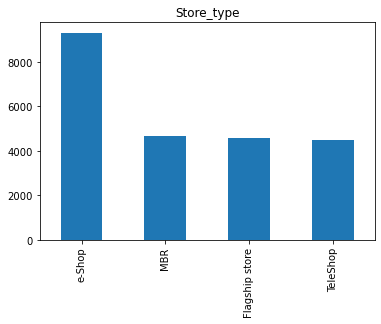

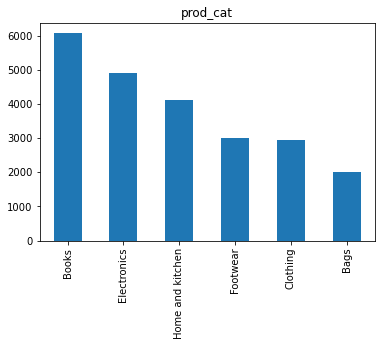

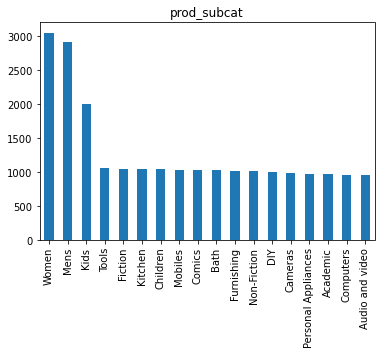

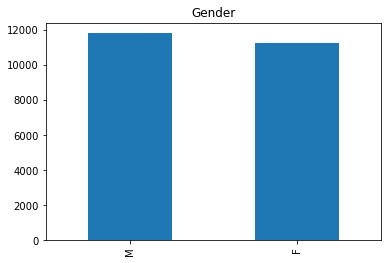

In [28]:
cat_data = Customer_Final[['Store_type','prod_cat','prod_subcat','Gender']]
for r in cat_data.columns:
    cat_data[r].value_counts().plot(kind = 'bar')
    plt.title(r)
    plt.show()

# 4. Time period of the available transaction data

In [29]:
Time =tran['tran_date'][0]-tran['tran_date'][23052]
Time = Time/  np.timedelta64(1, 'D')
print(f'Time period of the available transaction data is {Time} Days')

Time period of the available transaction data is 1130.0 Days


# The total amount of transaction was negative

In [30]:
Negative= tran[tran['total_amt']<0]
Negative=Negative.shape[0]
print(f"The total amount of transaction was negative is {Negative}")

The total amount of transaction was negative is 2177


# 5. Analyze which product categories are more popular among females vs male customers.

In [31]:
M= tran[tran['Gender']=='M']
F= tran[tran['Gender']=='F']

In [32]:
M['prod_cat'].value_counts()

Books               3120
Electronics         2570
Home and kitchen    2135
Clothing            1521
Footwear            1470
Bags                1004
Name: prod_cat, dtype: int64

In [33]:
F['prod_cat'].value_counts()

Books               2949
Electronics         2328
Home and kitchen    1994
Footwear            1529
Clothing            1439
Bags                 994
Name: prod_cat, dtype: int64

In [34]:
print('Books are more popular among both Males and Females')

Books are more popular among both Males and Females


# 6 Which City code has the maximum customers and what was the percentage of customers from that city?

In [35]:
city=tran['city_code'].value_counts()
print(city)
print(max(city))

4.0     2422
3.0     2419
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64
2422


In [36]:
print('Maximum customers from city 4 which is 2430')

Maximum customers from city 4 which is 2430


In [37]:
per=(max(city)*100/tran.shape[0])
per

10.506224786361862

In [38]:
print(f'Percentage from city 4 is {per:{1}.{4}}')

Percentage from city 4 is 10.51


# 7 Which store type sells the maximum products by value and by quantity?

In [39]:
pos= tran.copy(deep=True)

In [40]:
a=0
for var in pos['Qty']:
    if var < 0:
        pos['Qty'][a]=pos['Qty'][a]*-1
        a=a+1
    else:
        pos['Qty'][a]=pos['Qty'][a]
        a=a+1

C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/3854992894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['Qty'][a]=pos['Qty'][a]*-1
C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/3854992894.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['Qty'][a]=pos['Qty'][a]


In [41]:
a=0
for var in pos['total_amt']:
    if var < 0:
        pos['total_amt'][a]=pos['total_amt'][a]*-1
        a=a+1
    else:
        pos['total_amt'][a]=pos['total_amt'][a]
        a=a+1

C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/1482003182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['total_amt'][a]=pos['total_amt'][a]*-1
C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/1482003182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['total_amt'][a]=pos['total_amt'][a]


In [42]:
pos.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,5,-772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,5,-1497,785.925,8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,2,-791,166.110,1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,3,-1363,429.345,4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,2,-791,166.110,1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY


In [43]:
TeleShop= pos[pos['Store_type']=='TeleShop']
TeleShop1= TeleShop['Qty'].sum()
TeleShop2= TeleShop['total_amt'].sum()
print('products by sell\'s by TeleShop in value is {1} and by quantity{0}'.format(TeleShop1,TeleShop2))

products by sell's by TeleShop in value is 11541456.485 and by quantity13466


In [44]:
MBR= pos[pos['Store_type']=='MBR']
MBR1= MBR['Qty'].sum()
MBR2= MBR['total_amt'].sum()
print('products by sell\'s by MBR in value is {1} and by quantity{0}'.format(MBR1,MBR2))

products by sell's by MBR in value is 12142587.535 and by quantity13968


In [45]:
e_shop= pos[pos['Store_type']=='e-Shop']
e_shop1= e_shop['Qty'].sum()
e_shop2= e_shop['total_amt'].sum()
print('products by sell\'s by e-shop in value is {1} and by quantity{0}'.format(e_shop1,e_shop2))

products by sell's by e-shop in value is 24546403.7 and by quantity28107


In [46]:
Flagship= pos[pos['Store_type']=='Flagship store']
Flagship1= Flagship['Qty'].sum()
Flagship2= Flagship['total_amt'].sum()
print('products by sell\'s by Flagship store in value is {1} and by quantity{0}'.format(Flagship1,Flagship2))

products by sell's by Flagship store in value is 12097551.05 and by quantity13787


### From above result we can conclude that e-shop sell's maximun product by value and amount.

# 8 What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [47]:
Flagship= tran[tran['Store_type']=='Flagship store'] 

Flagship1= Flagship[(Flagship['prod_cat']=='Electronics') | (Flagship['prod_cat']=='Clothing')]
Flagship1              

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
59,83313344780,271288,2014-02-18,4,3,2,84,17.640,185.640,Flagship store,1991-02-25,F,3.0,Electronics,Mobiles
90,76990911956,270148,2014-02-16,4,3,4,448,188.160,1980.160,Flagship store,1979-08-03,M,1.0,Electronics,Mobiles
103,10942311291,271297,2014-02-15,3,1,2,756,158.760,1670.760,Flagship store,1980-02-17,M,10.0,Clothing,Kids
104,63352996926,272145,2014-02-15,5,3,4,1342,563.640,5931.640,Flagship store,1976-09-08,F,9.0,Electronics,Computers
112,57112244235,268076,2014-02-14,10,3,4,167,70.140,738.140,Flagship store,1978-07-08,M,8.0,Electronics,Audio and video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22984,49993147068,268722,2011-01-28,8,3,3,502,158.130,1664.130,Flagship store,1985-07-22,F,5.0,Electronics,Personal Appliances
22991,69708776426,271039,2011-01-28,5,3,5,464,243.600,2563.600,Flagship store,1980-04-11,M,3.0,Electronics,Computers
23007,71176929896,269201,2011-01-27,8,3,-5,-295,154.875,-1629.875,Flagship store,1991-02-03,M,9.0,Electronics,Personal Appliances
23027,71176929896,269201,2011-01-26,8,3,5,295,154.875,1629.875,Flagship store,1991-02-03,M,9.0,Electronics,Personal Appliances


In [48]:
F1=Flagship1['total_amt'].sum()

In [49]:
print('total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is :',F1)

total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is : 3409559.27


# 9 What was the total amount earned from "Male" customers under the "Electronics" category?

In [50]:
male= tran[(tran['Gender']=='M') & (tran['prod_cat']=='Electronics')]
m_ear=male['total_amt'].sum()

In [51]:
print(f'Total amount of earning from  "Male" customers under the "Electronics" category is {m_ear}')

Total amount of earning from  "Male" customers under the "Electronics" category is 5703109.424999999


# 10 How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [52]:
positive= tran[(tran['Qty']>0) & tran['total_amt']>0]

In [53]:
positive.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1986-10-13,M,1.0,Home and kitchen,Tools
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1971-09-03,M,6.0,Books,DIY
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,1970-06-26,F,10.0,Books,Comics
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,1979-06-27,M,9.0,Books,Fiction


In [54]:
ten= positive.groupby(['cust_id']).count().reset_index()
ten1= ten[ten['transaction_id']>9]
ten1

,cust_id,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
4,266794,11,11,11,11,11,11,11,11,11,11,11,11,11,11
366,267346,10,10,10,10,10,10,10,10,10,10,10,10,10,10
635,267768,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1041,268408,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1315,268819,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1585,269225,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1599,269245,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1732,269449,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2382,270462,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2426,270535,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [55]:
x=list(ten1['cust_id'])

In [56]:
new= tran.copy(deep=True)
new

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


In [57]:
a=-1

for v1 in new['cust_id']:
    a=a+1

    if int(v1) in x:
        pass
    else:
        new['cust_id'][a] = 0

C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/3655829635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['cust_id'][a] = 0


In [58]:
new= new[new['cust_id']>0]
new.shape[0]

304

In [59]:
new.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
150,15403541663,266794,2014-12-02,3,2,2,322,67.620,711.620,e-Shop,1971-02-28,F,9.0,Footwear,Women
197,64586839639,269225,2014-10-02,4,2,4,813,341.460,3593.460,TeleShop,1987-11-10,M,9.0,Footwear,Kids
299,94902984271,270831,2014-05-02,8,3,-5,-1221,641.025,-6746.025,Flagship store,1986-10-11,F,6.0,Electronics,Personal Appliances
413,94902984271,270831,2014-01-30,8,3,-5,-1221,641.025,-6746.025,Flagship store,1986-10-11,F,6.0,Electronics,Personal Appliances
445,79699211411,272286,2014-01-29,10,6,1,763,80.115,843.115,MBR,1983-05-13,M,8.0,Home and kitchen,Kitchen


In [60]:
new.cust_id.unique()

array([266794, 269225, 270831, 272286, 268819, 271565, 270908, 270535,
       268408, 269449, 274948, 275252, 273014, 274227, 274854, 272741,
       273708, 267768, 272354, 270803, 271834, 272415, 269245, 270462,
       272518, 273481, 267346], dtype=int64)

In [61]:
new.prod_subcat.unique()

array(['Women', 'Kids', 'Personal Appliances', 'Kitchen', 'Non-Fiction',
       'Computers', 'DIY', 'Fiction', 'Mens', 'Academic', 'Bath',
       'Audio and video', 'Furnishing', 'Tools', 'Mobiles', 'Cameras',
       'Children', 'Comics'], dtype=object)

In [62]:
new.prod_cat.unique()

array(['Footwear', 'Electronics', 'Home and kitchen', 'Books', 'Clothing',
       'Bags'], dtype=object)

# 11 For all customers aged between 25 - 35, find out:
    a. What was the total amount spent for “Electronics” and “Books” product categories?
    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [64]:
exp= tran.copy(deep=True)

In [65]:
exp.insert(3,'age',"")

In [66]:
exp['age'] =exp['tran_date']-exp['DOB']
exp['age'] = exp['age'] /  np.timedelta64(1, 'Y')

In [67]:
xx= exp[(exp['age']>25) & (exp['age']<35)]

In [68]:
xx.reset_index(inplace=True)

In [69]:
xx.shape

(9948, 17)

In [70]:
data=xx.groupby('cust_id')['age'].max()


In [71]:
fil=pd.DataFrame(data)

In [82]:
fil.reset_index(inplace=True)
fil = fil.rename(columns = {'index':'cust_id'})
fil.shape

(2822, 3)

In [73]:
h=[]
A=0
for x in fil['age']:
    k=[fil['cust_id'][A],x]
    h.append(k)
    A=A+1

In [78]:
a=0
for x in xx['cust_id']:
    D=[x,xx['age'][a]]
    if D in h:
        pass
    else:
        xx['cust_id'][a] = 0
        
    a=a+1

C:\Users\HARDIK~1\AppData\Local\Temp/ipykernel_12324/1082679536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['cust_id'][a] = 0


In [79]:
filtered= xx[xx['cust_id']!=0]
filtered

,index,transaction_id,cust_id,tran_date,age,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,0,80712190438,270351,2014-02-28,32.425033,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,3,93274880719,271509,2014-02-24,32.553714,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
2,5,97439039119,272357,2014-02-23,31.455814,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-09-10,F,6.0,Electronics,Personal Appliances
4,9,50076728598,269014,2014-02-21,34.237527,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances
7,15,56814940239,268799,2014-02-20,34.653689,7,5,5,368,193.200,2033.200,e-Shop,1979-06-27,M,9.0,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,22975,58531412371,274935,2011-01-29,33.388776,10,5,4,104,43.680,459.680,Flagship store,1977-09-09,F,3.0,Books,Non-Fiction
9915,22981,21279283580,271051,2011-01-28,34.957597,11,5,2,1375,288.750,3038.750,TeleShop,1976-02-13,F,3.0,Books,Children
9930,23012,40669483382,273676,2011-01-26,32.953449,3,2,1,1327,139.335,1466.335,Flagship store,1978-02-12,M,1.0,Footwear,Women
9937,23031,83245680995,273723,2011-01-26,27.014928,4,4,4,1477,620.340,6528.340,e-Shop,1984-01-21,F,4.0,Bags,Women


In [80]:
young1= filtered[(filtered['prod_cat']=='Books') | (filtered['prod_cat']=='Electronics')]
y1=young1['total_amt'].sum()
print('total amount spent for “Electronics” and “Books” product categories are', y1)

total amount spent for “Electronics” and “Books” product categories are 2940993.965


In [81]:
young2= filtered[(filtered['tran_date'] >= '2014-01-01') & (filtered['tran_date'] <= '2014-03-01')]
y2=young2['total_amt'].sum()
print('The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is', y2)

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 474133.4
